# Importing needed libraries

In [85]:
import numpy as np
import seaborn as sns
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import sklearn.datasets as sd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , recall_score
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn.feature_extraction
from nltk.tokenize import word_tokenize
import math
from collections import Counter 
from nltk.stem import WordNetLemmatizer  
from nltk.corpus import stopwords


# Importing Data

In [86]:
df = pd.read_csv('mail_data.csv')
df2 = pd.read_csv("completeSpamAssassin.csv")

In [87]:

# df2[df2['Label'] == 1]
df2 = df2.rename(columns={
    'Label' : 'Category',
    'Body' :  'Message'
})
df2 = df2.loc[:,['Category','Message']];
df2 = df2[df2['Category'] == 1];




# Analyzing Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
Number of Null values : 0
  Category                                            Message
0        0  Go until jurong point, crazy.. Available only ...
1        0                      Ok lar... Joking wif u oni...
2        1  Free entry in 2 a wkly comp to win FA Cup fina...
3        0  U dun say so early hor... U c already then say...
4        0  Nah I don't think he goes to usf, he lives aro...
5        1  FreeMsg Hey there darling it's been 3 week's n...
6        0  Even my brother is not like to speak with me. ...
7        0  As per your request 'Melle Melle (Oru Minnamin...
8        1  WINNER!! As a valued network customer you have...
9        1  Had your mobile 11 months or more? U R enti

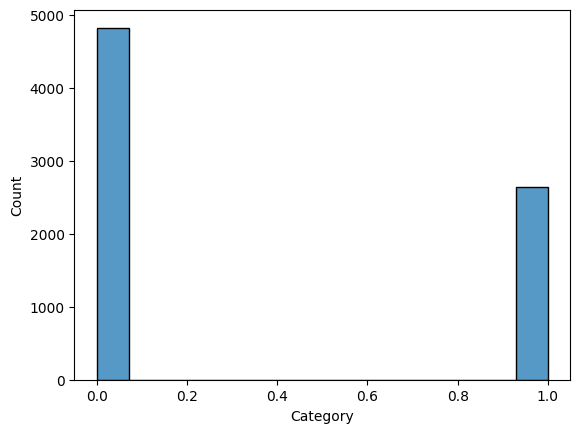

In [88]:
df.describe().T

df.info(verbose = True,show_counts = True)

# checking for NULL values

print(f'Number of Null values : {df.isnull().sum().sum()}');

# tranforming labels to numerical values  0 -> non-spam , 1 -> spam 

df.loc[df['Category'] == 'spam' , 'Category'] = 1;

df.loc[df['Category'] == 'ham' , 'Category'] = 0;


# merging data
df = pd.concat([df,df2]);



df['Message'] = df['Message'].fillna('');
df = df.dropna(subset=['Message','Category']);


sns.histplot(data = df['Category']);

print(df.head(n = 10))

# splitting to features and labels

features = df['Message']; 

label = df['Category'];

print("These are features  : ",features)

print("These are labels :  " , label)

# splitting data to (train,test)  data



In [89]:

x_train , x_test , y_train , y_test = train_test_split(features , label , test_size = 0.2 , random_state = 40);


# Tokenizing & extracting features

In [90]:
# nltk.download('stopwords');
# nltk.download('punkt');
# word tokenization + removing non-alpha caracters + removing stop words + Lemmatization
# df['tokens'] = df['Message'].apply(word_tokenize);
# df['tokens'] = df['tokens'].apply(lambda arr : [token.lower() for token in arr if token not in stopwords.words('english') and token.isalpha() ])

# df['Message'] = df['Message'].fillna('');

vecto = TfidfVectorizer(min_df = 10 , stop_words = 'english' , lowercase = True);

print(x_train);


x_train_num = np.array(vecto.fit_transform(x_train).toarray());

x_test_num = vecto.transform(x_test)

y_train = y_train.astype('int')

y_test = y_test.astype('int')


print("These are the features : " , vecto.get_feature_names_out());

print(" Those are the extracted numerical data & Labels : "  , x_train_num.shape , y_train  );




275                       No objection. My bf not coming.
832     Hi mate its RV did u hav a nice hol just a mes...
2844    Tunji, how's the queen? how are you doing. Thi...
1481                    Have you always been saying welp?
1757    Lmao ok I wont be needing u to do my hair anym...
                              ...                        
3064    Hi babe its Jordan, how r u? Im home from abro...
737                                                 empty
579     Snoring problems? Let Snore\nEliminator's all ...
791     The World's #1 On-line PharmacyOrder from the ...
3398                         Heehee that was so funny tho
Name: Message, Length: 5974, dtype: object
These are the features :  ['00' '000' '000000' ... '½wï' '½zï' '½ï']
 Those are the extracted numerical data & Labels :  (5974, 3254) 275     0
832     0
2844    0
1481    0
1757    0
       ..
3064    1
737     1
579     1
791     1
3398    0
Name: Category, Length: 5974, dtype: int64


# Training the model & testing using scikit learn


In [91]:
model = LogisticRegression();

model.fit(x_train_num,y_train);

# testing our model

x_test_prediction = model.predict(x_test_num);

print(accuracy_score(y_test,x_test_prediction));

# recall calc 

print(recall_score(y_test , x_test_prediction));



0.9344042838018741
0.8369565217391305


# Spam / ham mail prediction

In [97]:
# mail = ["You have earned 300$ , pay 100$ to get it !! . consider subsribing to this email for more opportunities in the near future !!"];
mail = ["that is crap"]

# tfidf vectorizing mail : 

# vecto.fit(mail) 

mail_num = vecto.transform(mail);
        
pre = model.predict(mail_num);

if pre == 1 :
    print("the Mail is a  : spam ");
else:
    print("the mail is : Ham") 
    




the mail is : Ham
